In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


plt.rcParams['figure.dpi'] = 200

Brownian Motion in the for Loop below are generatted as follows:

- T0 = 0
- Tn - Tn+1 is a random normaly distributed variable with 0 Mean and sigma sqrt(dt)


Here, we are plotting a geometric Brownian Motion. Lets call it G(t).

dG = MEAN * G * Dt + SIGMA * G * DX

Lets first build below the following:

dG = MEAN * Dt + SIGMA dX



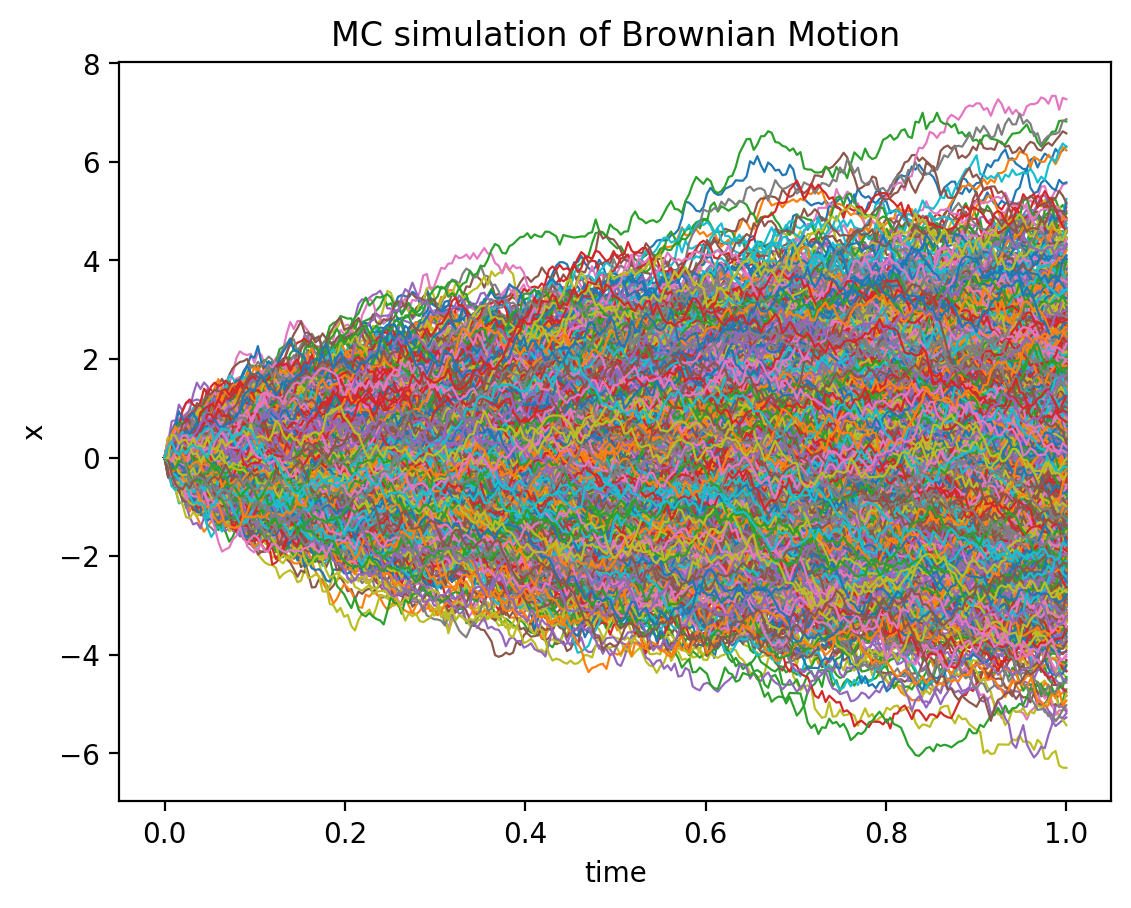

In [14]:
MONTE_CARLO_NUMBER = 2000 # Number of Simulations 
N = 252 # Subdivision of BM - returns generated at the end of each trading day
T = 1
MEAN = 0.2
SIGMA = 2


Timescale = np.linspace(0, T, N)
SumOfBM = np.full(shape=(N*T, MONTE_CARLO_NUMBER), fill_value=0.0) 

# stores data for Brownian Motions in (N*T) * (Number of simulations) array. Similar do pd.DataFrame
# fill_value = 0.0 and not 0 because we want the whole table to be float not int

dt = Timescale[1] - Timescale[0]

simulations = range(MONTE_CARLO_NUMBER) # iterates param times

for each in simulations:
    dX = np.sqrt(dt)*np.random.normal(size=(N-1))  # increments in Brownian Motion sqrt of time 
    dG = MEAN*dt + SIGMA*dX
    
    BrownianMotion = np.concatenate((np.array([0]),np.cumsum(dG)))
    SumOfBM[:,each] = BrownianMotion
    
plt.plot(Timescale, SumOfBM, linewidth=0.8)
plt.ylabel('x')
plt.xlabel('time')
plt.title('MC simulation of Brownian Motion', )
#plt.savefig('MCBrownianMotion1.png', dpi=500) # Saves a png version cause its cool
plt.show()

Can play around with the values of the strike (Var STRIKE). Currently, the strike is the drift rate to calculate the accuracy of the mean calculations 

I.e. Drift rate (mu) is expectation ==Should imply==> p(X > mu) = 0.5


The prob of the call option bein in the money is: 9.25 % 



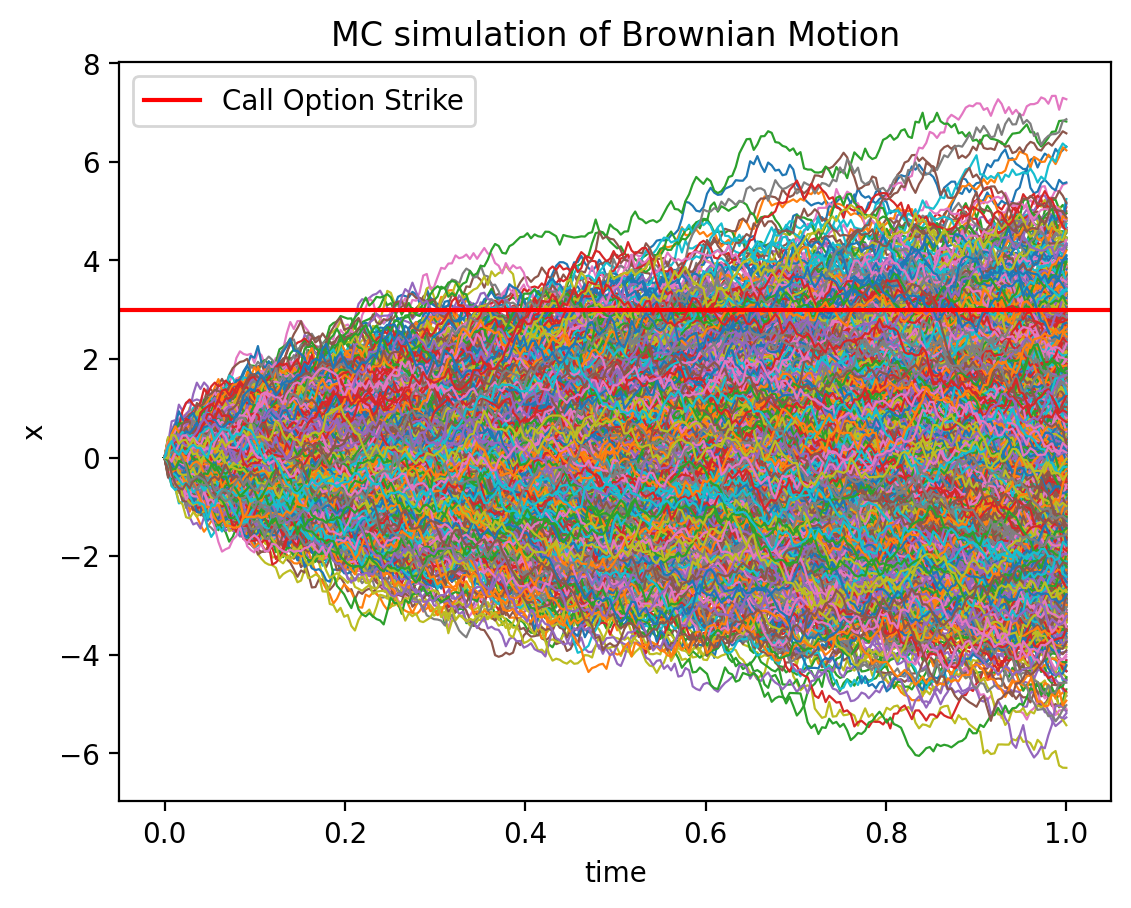

In [23]:
"""------CALL OPTION------"""


STRIKE_C = 3

# Gets the % of simulations that were above strike price at exp

Lastrow = list(SumOfBM[N-1])
payoff = []
for sim in Lastrow:
    payoff.append(np.maximum(sim-STRIKE_C, 0))

try:
    Probinmoney = 1 - Counter(payoff).get(float(0))/MONTE_CARLO_NUMBER
except:
    Probinmoney = 1


    
print(f'The prob of the call option bein in the money is: {round(Probinmoney*100, 4)} % \n')
    
    
plt.plot(Timescale, SumOfBM, linewidth=0.8)
plt.ylabel('x')
plt.xlabel('time')
plt.title('MC simulation of Brownian Motion', )    
plt.axhline(y=STRIKE_C, color='r', linestyle='-',label="Call Option Strike")
plt.legend(loc="upper left")
plt.show()

The prob of the European Put Option being in the money is: 90.75 % 



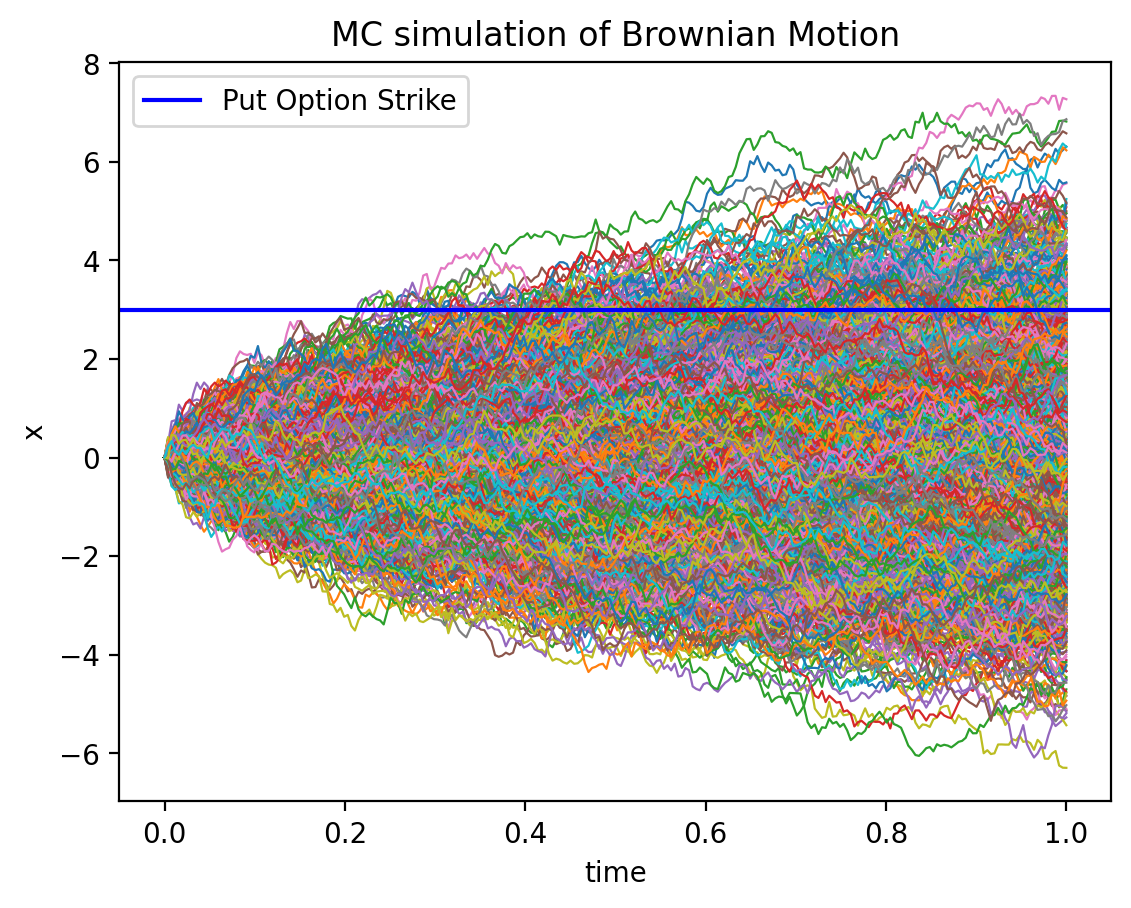

In [24]:
"""------PUT OPTION------"""


STRIKE_P = 3

# Gets the % of simulations that were above strike price at exp

Lastrow = list(SumOfBM[N-1])
payoff = []
for sim in Lastrow:
    payoff.append(np.maximum(STRIKE_P-sim, 0))

try:
    Probinmoney = 1 - Counter(payoff).get(float(0))/MONTE_CARLO_NUMBER
except:
    Probinmoney = 1
    
    
print(f'The prob of the European Put Option being in the money is: {round(Probinmoney*100, 4)} % \n')

plt.plot(Timescale, SumOfBM, linewidth=0.8)
plt.ylabel('x')
plt.xlabel('time')
plt.title('MC simulation of Brownian Motion', )    
plt.axhline(y=STRIKE_P, color='b', linestyle='-',label="Put Option Strike")
plt.legend(loc="upper left")
plt.show()

# Left to do: 

- Set an S0 var to the Brownian Motion 
- Set a custom time frame for time to expiry: Here, only pricing 1y options
- Finish the pricing formula of the option to output price
- Make it interchangable to allow a change in model used
